In [1]:
pip install librosa


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#wav extension is necessary in case of the Audio file
filename='UrbanSound8K/dog_bark.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

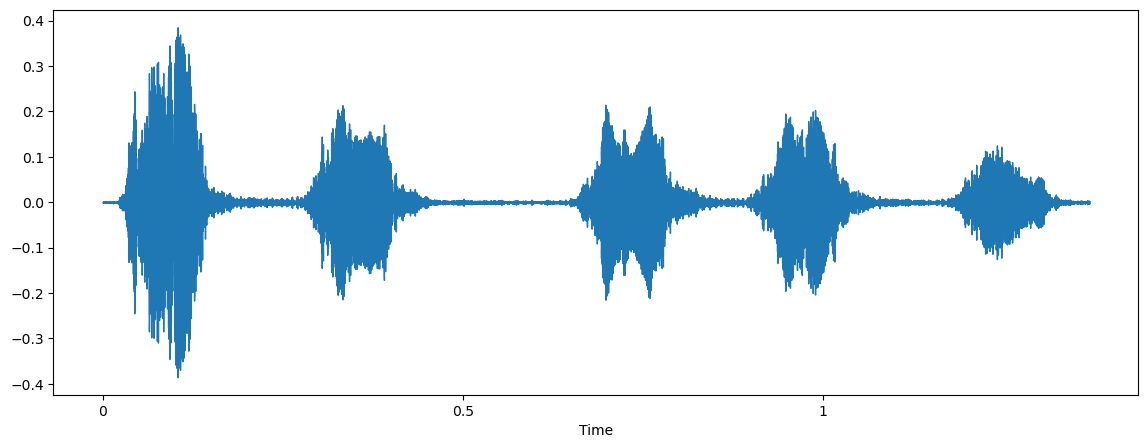

In [5]:
#Sample Rate (or Sampling Rate) refers to the number of samples of audio recorded per second. 
#It is measured in Hertz (Hz). For example, a sample rate of 44,100 Hz (or 44.1 kHz)
#means that there are 44,100 samples captured every second

#data: which means the Amplitude of each wave in sample it is 1D array

plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
#Librosa:
#Default Sample Rate: Librosa loads audio files at a default sample rate of 22050 Hz if you don't specify a sample rate.
#Resampling: Librosa automatically resamples the audio to this default rate unless you tell it otherwise.

#SciPy:
#No Default Resampling: SciPy uses the sample rate that is actually present in the audio file without resampling it unless explicitly told to.
#Real Sample Rate: It will use the original sample rate of the file, which might be 11025 Hz in your case, if that’s how the audio was recorded or exported.


In [6]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [7]:
sample_rate

22050

In [8]:
wave_sample_rate

44100

In [9]:
# it is from scipy it won't simplifies the value
wave_audio

array([[ 14,   2],
       [ 18,  10],
       [ 17,  13],
       ...,
       [110,  69],
       [118,  63],
       [123,  51]], dtype=int16)

In [10]:
#it is from librosa it simplfies the value in range from [-1 to +1]
data

array([0.00023074, 0.00047231, 0.00050354, ..., 0.0027059 , 0.0029642 ,
       0.00198754], dtype=float32)

In [11]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata
metadata.head(1)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark


In [12]:
#check weather the dataset is IMBALANCED OR BALANCED
metadata['class'].value_counts()
# it is balanced result

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

 Audio Calssification and Data Preporcessing

In [13]:
#reading the sample audion using Librosa
import librosa
audio_file_path='UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [14]:
#it willl give the output in single dimensional array and value is Normalized
#(even is it two channel it make it into Mono channel)
librosa_audio_data

array([ 0.00331575,  0.00467553,  0.00361099, ..., -0.00376796,
       -0.00347471, -0.00357828], dtype=float32)

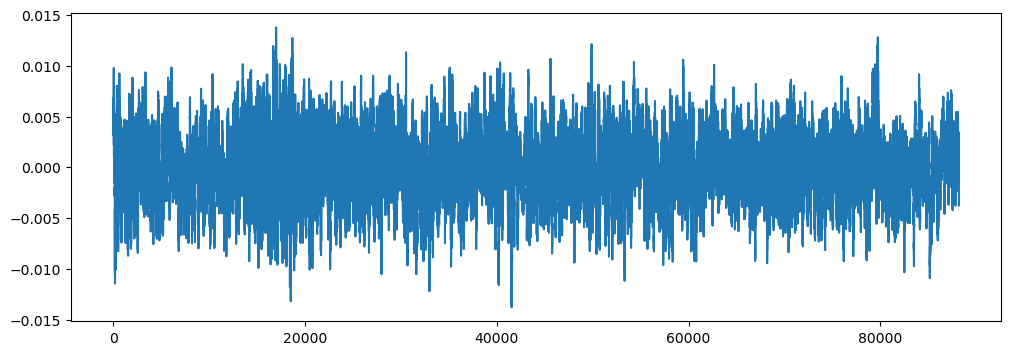

In [15]:
#plotting the librosa audio data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [16]:
#lets read throght the scipy
from scipy.io import wavfile as wav
wav_sample_rat,wave_audio=wav.read(audio_file_path)

In [17]:
#it will give the output as same in the original if it is 2D means 2D array
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

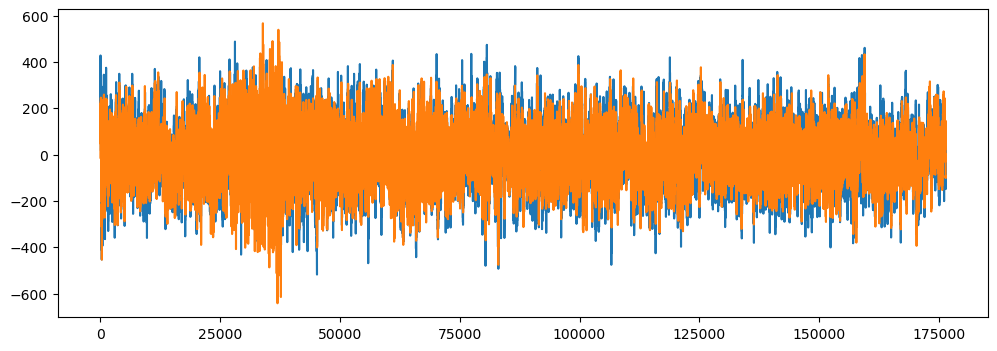

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

MFCC, or Mel Frequency Cepstral Coefficients, is a feature commonly used in audio processing and speech recognition. It captures the important features of an audio signal that are useful for tasks like speech and speaker recognition, music genre classification, and more.

The result is a set of coefficients that effectively represent the spectral properties of the audio in a form suitable for further analysis. In practice, MFCCs are often used as input features for machine learning models in audio classification tasks.

In [19]:
#we applied the logic for the one paticualar file we need to make it for large number of files in next CELL
mfcc=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
mfcc.shape

(40, 173)

In [20]:
#EXTRACTING THE mfcc FOR EVERY AUDION FILE
import pandas as pd
import os
import librosa
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

#output of this cell consists of the files and folders which are in connection
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [21]:
#below function process for the one audio file

def features_extractor(file_name):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [26]:
#in order to do for the all audio files i need to iterate through all the audio files bz there i willl get relation b/w files adn folders
import numpy as np
from tqdm import tqdm
import resampy
import resampy
print("Resampy version:", resampy.__version__)
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data=features_extractor(file_name)
    final_class_labels=row["class"]
    extracted_features.append([data,final_class_labels])


Resampy version: 0.4.3


3554it [02:39, 26.00it/s]C:\Users\rohan\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [05:32, 36.42it/s]C:\Users\rohan\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\rohan\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:47, 25.14it/s]


In [57]:
pip install resampy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()


,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [28]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [29]:
##(8732,40)
X.shape

(8732, 40)

In [58]:
#before encodeing the class value as NAMES
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [30]:
##(8732,10)  ===> 10 refer to the features
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [59]:
#After encodeing the class value as NAMES
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
#splitting it inot train and teat set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [33]:
X

array([[-2.1735526e+02,  7.0223389e+01, -1.3038527e+02, ...,
        -1.6930534e+00, -6.1698347e-01,  3.8600525e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489316e-01, -5.4468715e-01,  4.4632089e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140957e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
        -3.0292377e+00,  2.7170296e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082427e+00, -1.6414584e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386442e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [34]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
X_train.shape

(6985, 40)

In [36]:
X_test.shape

(1747, 40)

In [37]:
y_train.shape

(6985, 10)

In [39]:
y_test.shape

(1747, 10)

Model  Creation Using the TENSERFLOW

In [40]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import tensorflow as tf

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
#It will gives the resukt for the Number of Classes
num_labels=y.shape[1]

In [46]:
Dense(64)

<Dense name=dense_4, built=False>

In [47]:
model=Sequential()
#first LAyer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [55]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='Audio processing and training model/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - loss: 0.9675
Epoch 1: val_loss improved from inf to 0.75256, saving model to Audio processing and training model/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6788 - loss: 0.9675 - val_accuracy: 0.7636 - val_loss: 0.7526
Epoch 2/100
192/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - loss: 0.9459
Epoch 2: val_loss improved from 0.75256 to 0.73927, saving model to Audio processing and training model/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6929 - loss: 0.9468 - val_accuracy: 0.7762 - val_loss: 0.7393
Epoch 3/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.9196
Epoch 3: val_loss did not improve from 0.73927
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 0.9203 - val_accuracy: 0.7733 - val_loss: 0.7587
Epoch 4/100
201/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6952 - loss: 0.9

In [56]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7985117435455322


In [57]:
filename = "UrbanSound8K/dog_bark.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)

# Predict probabilities for each class
predictions = model.predict(prediction_feature)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: [3]


In [52]:
#it will give unique calsses we need to find the answer in which the above output will come
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

Testing Some Test Audio Data

Steps
1.Preprocess the new audio data
2.predict the classes
3.Invere transform your Predicted Label

In [64]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import librosa

filename = "UrbanSound8K/child.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print("MFCCs Scaled Features:", mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print("MFCCs Scaled Features Reshaped:", mfccs_scaled_features)
print("Shape of MFCCs Scaled Features:", mfccs_scaled_features.shape)

# Predict probabilities for each class
predicted_probabilities = model.predict(mfccs_scaled_features)

# Get the predicted class index
predicted_label = np.argmax(predicted_probabilities, axis=1)
print("Predicted Label Index:", predicted_label)

# Decode the predicted class label
prediction_class = labelencoder.inverse_transform(predicted_label)
print("Predicted Class:", prediction_class)


MFCCs Scaled Features: [-2.0844640e+02  1.0460029e+02 -3.6193501e+01  4.0528641e+01
 -1.4326417e+01  2.0096268e+01 -2.9194805e-01  1.0546738e+01
  2.1552258e+00  1.4949743e+01  1.3851684e+00  1.2023320e+01
  3.3690982e+00  1.5055429e+01  3.7473352e+00  3.3751590e+00
 -1.1403420e+00  3.0271773e+00  4.7380724e+00  6.1244926e+00
  8.2589543e-01  5.4442825e+00  3.1348546e+00  3.7377210e+00
 -3.0138564e+00  1.7480583e+00  2.4110315e+00 -1.9862325e-01
 -1.4790349e+00  7.4168468e-01  1.2274033e+00 -7.1314716e-01
 -6.3178620e+00 -4.0659575e+00 -4.0247555e+00 -9.1207337e-01
 -9.9338692e-01 -1.0947529e+00  6.8617469e-01  1.6645768e+00]
MFCCs Scaled Features Reshaped: [[-2.0844640e+02  1.0460029e+02 -3.6193501e+01  4.0528641e+01
  -1.4326417e+01  2.0096268e+01 -2.9194805e-01  1.0546738e+01
   2.1552258e+00  1.4949743e+01  1.3851684e+00  1.2023320e+01
   3.3690982e+00  1.5055429e+01  3.7473352e+00  3.3751590e+00
  -1.1403420e+00  3.0271773e+00  4.7380724e+00  6.1244926e+00
   8.2589543e-01  5.4442